<a href="https://colab.research.google.com/github/Priyanshu-4096/21BDS0083_EDA/blob/main/21BDS0083_eda_mod4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/Priyanshu-4096/21BDS0083_EDA

#Name - Priyanshu Joarder
#Reg no - 21BDS0083
#Course Title - Exploratory Data Analysis
#Course Code - BCSE331L

Data Cleaning

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Load the dataset
df = pd.read_csv('SuicideChina.csv')

# Data deduplication
print("Duplicate rows before deduplication:", df.duplicated().sum())
df = df.drop_duplicates()
print("Duplicate rows after deduplication:", df.duplicated().sum())

# Replacing values
df['Hospitalised'] = df['Hospitalised'].replace('yes', 1).replace('no', 0)
df['Died'] = df['Died'].replace('yes', 1).replace('no', 0)
df['Urban'] = df['Urban'].replace('yes', 1).replace('no', 0)

# Discretization and binning
df['Age_group'] = pd.cut(df['Age'], bins=[-1, 20, 40, 60, 80, 100], labels=['0-19', '20-39', '40-59', '60-79', '80+'])

# Handling missing data
print("\nMissing values per column:")
print(df.isnull().sum())

# Traditional method - Mean imputation
imputer = SimpleImputer(strategy='mean')
df[['Age']] = imputer.fit_transform(df[['Age']])

# Maximum Likelihood Estimation (MLE) imputation (for comparison)
imputer_mle = IterativeImputer(max_iter=10, random_state=42)
df[['Age']] = imputer_mle.fit_transform(df[['Age']])

print("\nMissing values after imputation:")
print(df.isnull().sum())

# Save the transformed dataset
df.to_csv('SuicideChina_transformed.csv', index=False)

Duplicate rows before deduplication: 0
Duplicate rows after deduplication: 0

Missing values per column:
rownames        0
Person_ID       0
Hospitalised    0
Died            0
Urban           0
Year            0
Month           0
Sex             0
Age             0
Education       0
Occupation      0
method          0
Age_group       0
dtype: int64

Missing values after imputation:
rownames        0
Person_ID       0
Hospitalised    0
Died            0
Urban           0
Year            0
Month           0
Sex             0
Age             0
Education       0
Occupation      0
method          0
Age_group       0
dtype: int64


<ipython-input-1-8388480c3057>:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Hospitalised'] = df['Hospitalised'].replace('yes', 1).replace('no', 0)
<ipython-input-1-8388480c3057>:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Died'] = df['Died'].replace('yes', 1).replace('no', 0)


Module 4:Data Summarization and Visualization

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the dataset
df = pd.read_csv('SuicideChina_transformed.csv')

# 1. Statistical Summary Measures
print("1. STATISTICAL SUMMARY MEASURES")
print("\nNumerical Variables Summary:")
print(df[['Age', 'Year', 'Month']].describe())

print("\nCategorical Variables Summary:")
categorical_cols = ['Sex', 'Education', 'Occupation', 'method']
for col in categorical_cols:
    print(f"\n{col} value counts:")
    print(df[col].value_counts())
    print(f"\n{col} mode:", df[col].mode()[0])



1. STATISTICAL SUMMARY MEASURES

Numerical Variables Summary:
               Age         Year        Month
count  2571.000000  2571.000000  2571.000000
mean     52.630883  2010.045508     6.298327
std      19.783878     0.791412     3.202515
min      12.000000  2009.000000     1.000000
25%      37.000000  2009.000000     4.000000
50%      53.000000  2010.000000     6.000000
75%      69.000000  2011.000000     9.000000
max     100.000000  2011.000000    12.000000

Categorical Variables Summary:

Sex value counts:
Sex
female    1328
male      1243
Name: count, dtype: int64

Sex mode: female

Education value counts:
Education
Secondary    1280
primary       659
iliterate     533
unknown        80
Tertiary       19
Name: count, dtype: int64

Education mode: Secondary

Occupation value counts:
Occupation
farming             2032
household            248
others/unknown       156
professional          37
student               35
unemployed            30
business/service      21
worker        


2. ONE-DIMENSIONAL STATISTICAL ANALYSIS

Age Statistics:
Skewness: 0.014247723008419023
Kurtosis: -1.0036265642269162


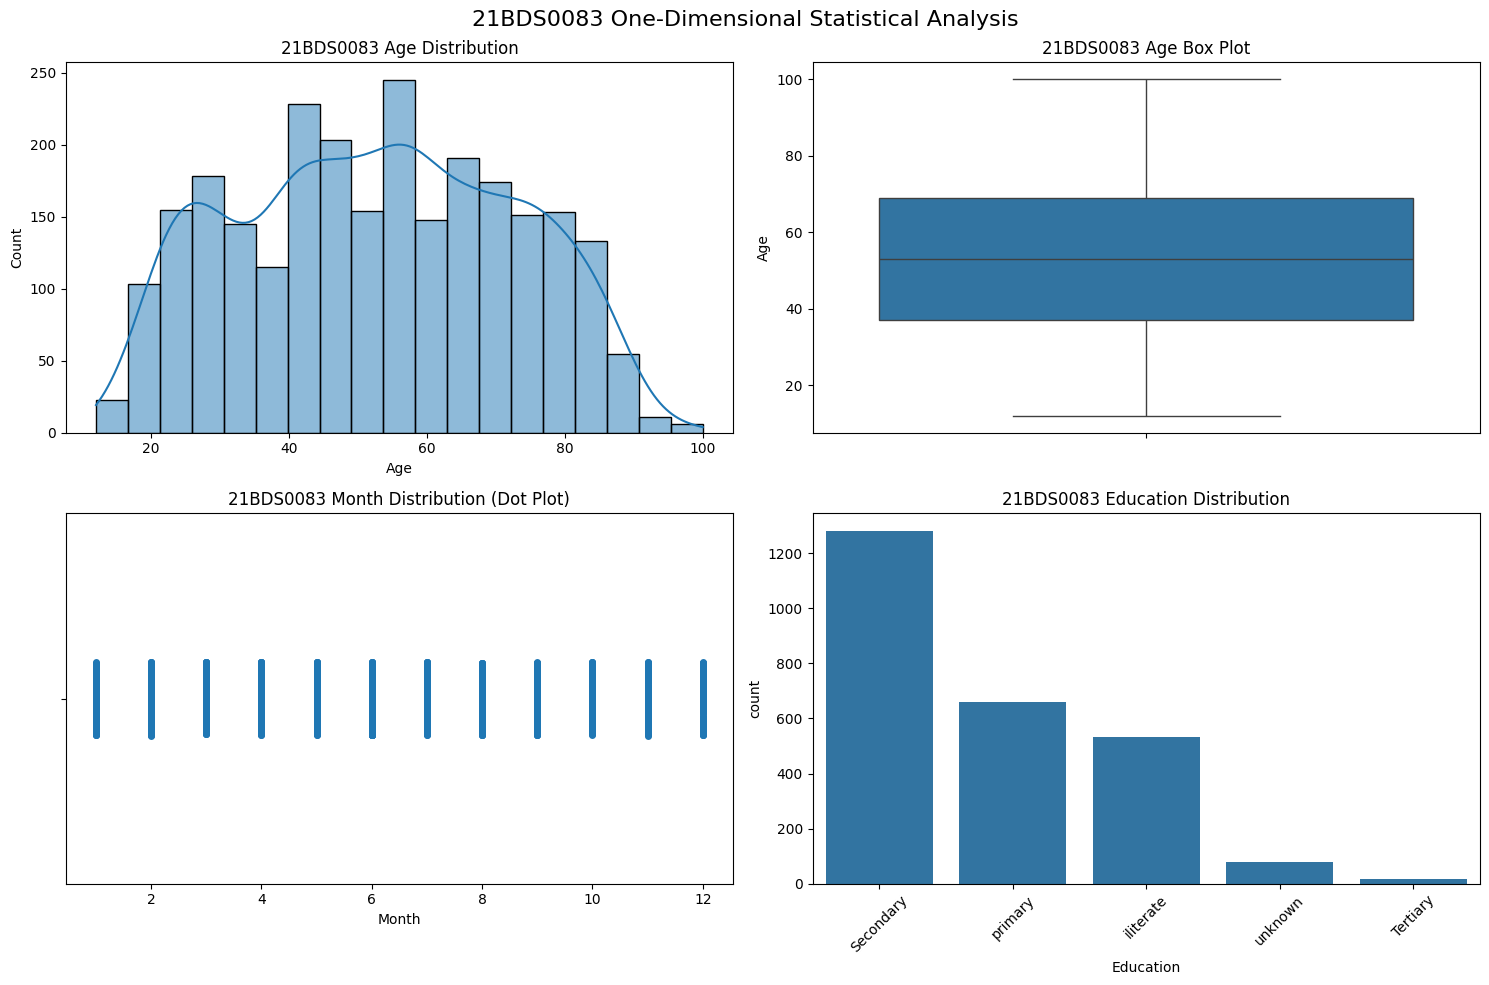

In [4]:
# 2. 1-D Statistical Analysis
print("\n2. ONE-DIMENSIONAL STATISTICAL ANALYSIS")

# Age Analysis
print("\nAge Statistics:")
print("Skewness:", stats.skew(df['Age']))
print("Kurtosis:", stats.kurtosis(df['Age']))

# Visualization of 1-D Analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('21BDS0083 One-Dimensional Statistical Analysis', fontsize=16)

# Age Distribution
sns.histplot(data=df, x='Age', kde=True, ax=axes[0,0])
axes[0,0].set_title('21BDS0083 Age Distribution')
axes[0,0].set_xlabel('Age')
axes[0,0].set_ylabel('Count')

# Box Plot for Age
sns.boxplot(data=df, y='Age', ax=axes[0,1])
axes[0,1].set_title('21BDS0083 Age Box Plot')
axes[0,1].set_ylabel('Age')

# Dot Plot for Month
sns.stripplot(data=df, x='Month', ax=axes[1,0])
axes[1,0].set_title('21BDS0083 Month Distribution (Dot Plot)')
axes[1,0].set_xlabel('Month')

# Bar Plot for Education
sns.countplot(data=df, x='Education', ax=axes[1,1])
axes[1,1].set_title('21BDS0083 Education Distribution')
axes[1,1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


3. TWO-DIMENSIONAL STATISTICAL ANALYSIS

Correlation Matrix:
            Age      Year     Month
Age    1.000000 -0.017267 -0.028397
Year  -0.017267  1.000000  0.009380
Month -0.028397  0.009380  1.000000

Chi-square test (Sex vs Education):
Chi-square statistic: 7.22
p-value: 0.1247


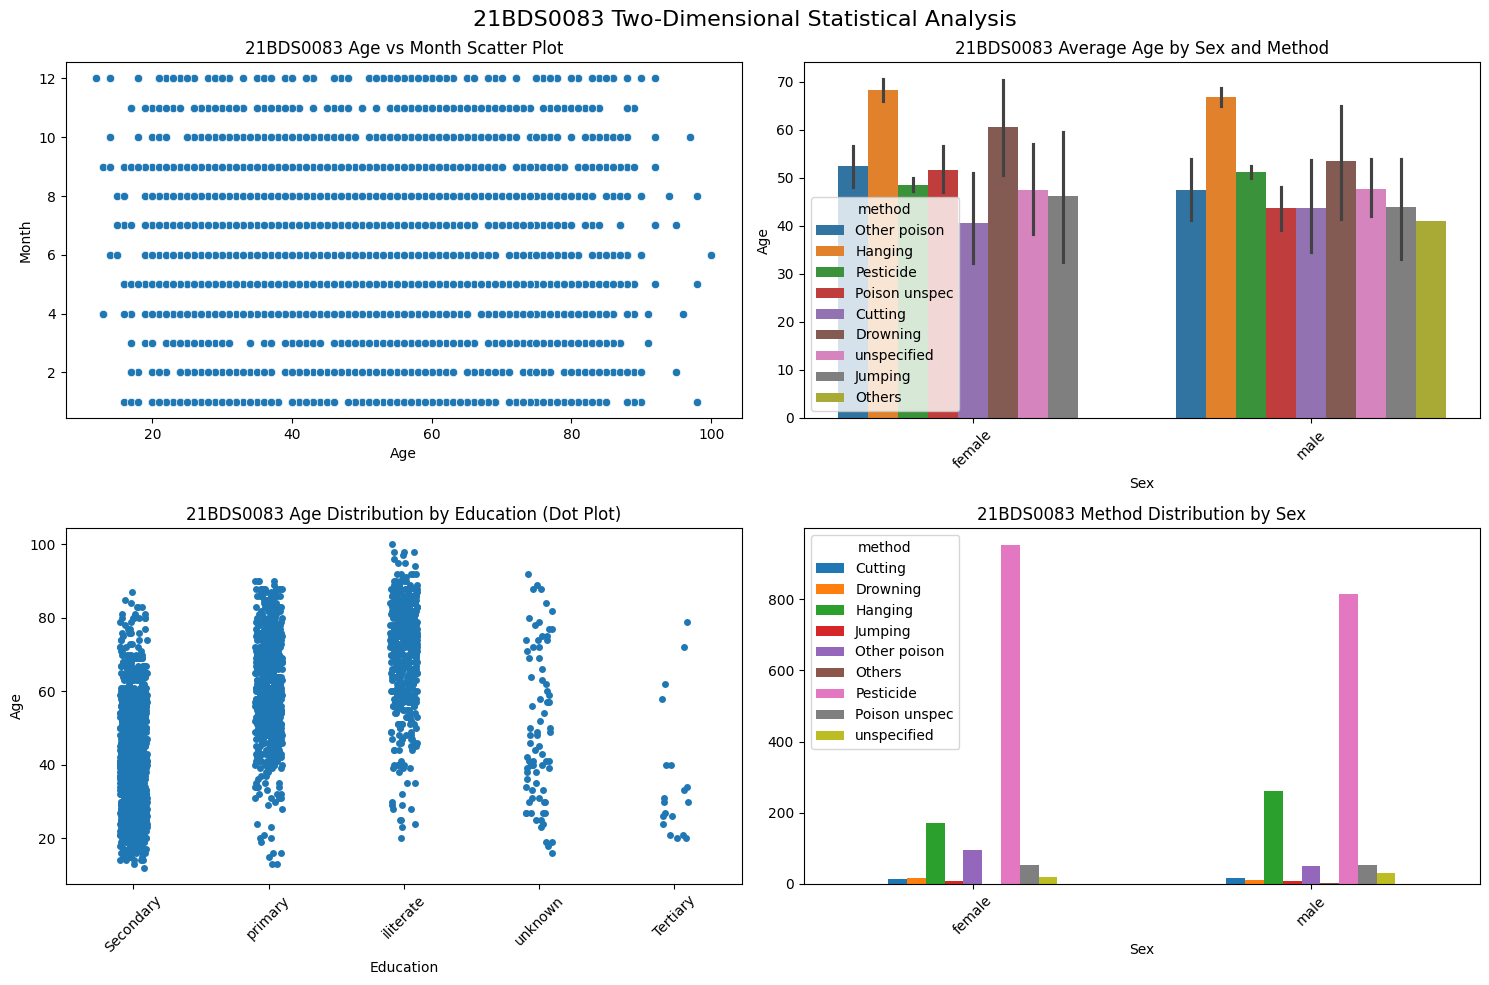

In [5]:
# 3. 2-D Statistical Analysis
print("\n3. TWO-DIMENSIONAL STATISTICAL ANALYSIS")

# Correlation Analysis for Numerical Variables
numeric_corr = df[['Age', 'Year', 'Month']].corr()
print("\nCorrelation Matrix:")
print(numeric_corr)

# Chi-square test for categorical variables
print("\nChi-square test (Sex vs Education):")
chi2, p_value = stats.chi2_contingency(pd.crosstab(df['Sex'], df['Education']))[:2]
print(f"Chi-square statistic: {chi2:.2f}")
print(f"p-value: {p_value:.4f}")

# Visualization of 2-D Analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('21BDS0083 Two-Dimensional Statistical Analysis', fontsize=16)

# Scatter Plot: Age vs Month
sns.scatterplot(data=df, x='Age', y='Month', ax=axes[0,0])
axes[0,0].set_title('21BDS0083 Age vs Month Scatter Plot')

# Bar Plot: Sex vs Method
sns.barplot(data=df, x='Sex', y='Age', hue='method', ax=axes[0,1])
axes[0,1].set_title('21BDS0083 Average Age by Sex and Method')
axes[0,1].tick_params(axis='x', rotation=45)

# Dot Plot: Age vs Education
sns.stripplot(data=df, x='Education', y='Age', ax=axes[1,0])
axes[1,0].set_title('21BDS0083 Age Distribution by Education (Dot Plot)')
axes[1,0].tick_params(axis='x', rotation=45)

# Bar Plot: Method Distribution by Sex
pd.crosstab(df['Sex'], df['method']).plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('21BDS0083 Method Distribution by Sex')
axes[1,1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


4. CONTINGENCY TABLES

Sex vs Education:
Education  Secondary  Tertiary  iliterate  primary  unknown
Sex                                                        
female           678         9        289      314       38
male             602        10        244      345       42

Method vs Education:
Education      Secondary  Tertiary  iliterate  primary  unknown
method                                                         
Cutting               16         0          6        6        1
Drowning               9         0          9        8        0
Hanging               73         3        164      184        7
Jumping               13         1          0        1        0
Other poison          82         2         22       25       15
Others                 0         0          0        0        1
Pesticide            987        10        325      407       39
Poison unspec         65         3          4       18       17
unspecified           35         0          3       10  

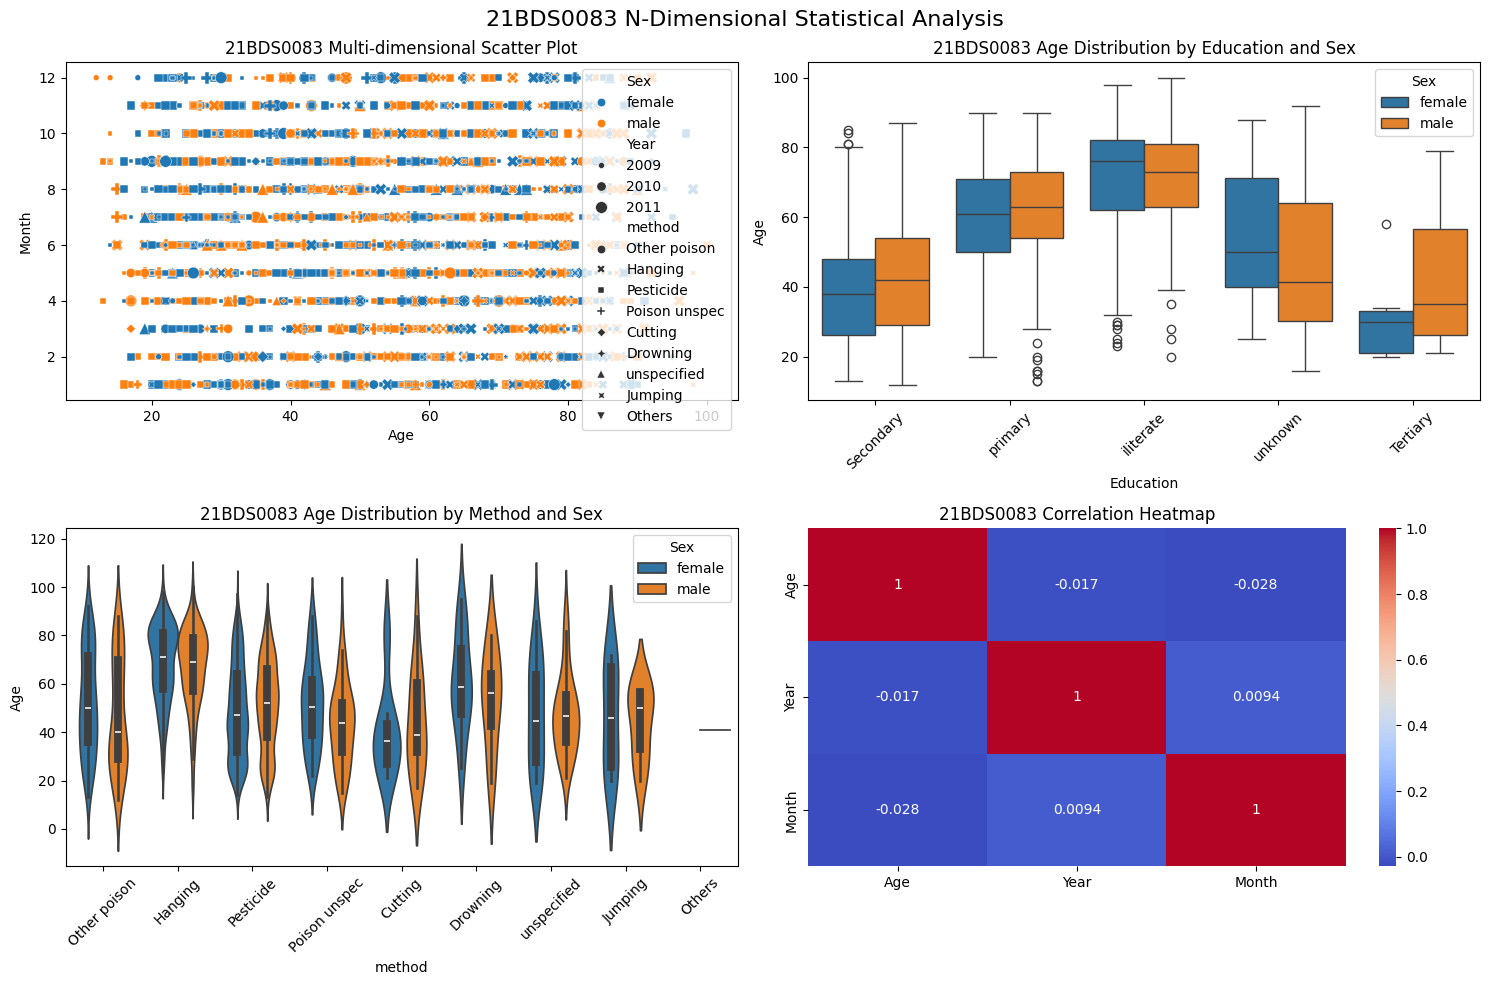


6. ADDITIONAL STATISTICAL MEASURES

Age statistics by Sex:
         count       mean        std   min   25%   50%    75%    max
Sex                                                                 
female  1328.0  51.530120  20.118878  13.0  35.0  50.0  67.25   98.0
male    1243.0  53.806919  19.358589  12.0  40.0  55.0  69.00  100.0

Age statistics by Education and Sex:
                       mean        std  count
Education Sex                                
Secondary female  38.960177  14.553417    678
          male    42.406977  15.566897    602
Tertiary  female  30.111111  11.868492      9
          male    42.300000  21.076844     10
iliterate female  71.695502  14.733183    289
          male    70.729508  13.524881    244
primary   female  60.449045  14.156100    314
          male    62.881159  14.593536    345
unknown   female  53.815789  19.045969     38
          male    47.095238  21.162334     42

One-way ANOVA test for Age across Education levels:
F-statistic: 480.00
p

In [6]:

# 4. Contingency Tables
print("\n4. CONTINGENCY TABLES")

print("\nSex vs Education:")
print(pd.crosstab(df['Sex'], df['Education']))

print("\nMethod vs Education:")
print(pd.crosstab(df['method'], df['Education']))

print("\nOccupation vs Sex:")
print(pd.crosstab(df['Occupation'], df['Sex']))

# 5. N-D Statistical Analysis
print("\n5. N-DIMENSIONAL STATISTICAL ANALYSIS")

# Create a figure for n-dimensional analysis
fig = plt.figure(figsize=(15, 10))
fig.suptitle('21BDS0083 N-Dimensional Statistical Analysis', fontsize=16)

# Scatter plot with multiple dimensions
plt.subplot(221)
sns.scatterplot(data=df, x='Age', y='Month', hue='Sex', size='Year', style='method')
plt.title('21BDS0083 Multi-dimensional Scatter Plot')

# Box plot with multiple groupings
plt.subplot(222)
sns.boxplot(data=df, x='Education', y='Age', hue='Sex')
plt.title('21BDS0083 Age Distribution by Education and Sex')
plt.xticks(rotation=45)

# Violin plot with multiple dimensions
plt.subplot(223)
sns.violinplot(data=df, x='method', y='Age', hue='Sex')
plt.title('21BDS0083 Age Distribution by Method and Sex')
plt.xticks(rotation=45)

# Heat map of correlations
plt.subplot(224)
sns.heatmap(numeric_corr, annot=True, cmap='coolwarm')
plt.title('21BDS0083 Correlation Heatmap')

plt.tight_layout()
plt.show()

# Additional Statistical Measures
print("\n6. ADDITIONAL STATISTICAL MEASURES")

# Group statistics
print("\nAge statistics by Sex:")
print(df.groupby('Sex')['Age'].describe())

print("\nAge statistics by Education and Sex:")
print(df.groupby(['Education', 'Sex'])['Age'].agg(['mean', 'std', 'count']))

# ANOVA test
education_groups = [group for _, group in df.groupby('Education')['Age']]
f_statistic, p_value = stats.f_oneway(*education_groups)
print("\nOne-way ANOVA test for Age across Education levels:")
print(f"F-statistic: {f_statistic:.2f}")
print(f"p-value: {p_value:.4f}")